In [1]:
import geopandas as gpd

# Получение границы СФО для дальнейших операций

In [4]:
df = gpd.read_file("./data/admin_level_3.shp", encoding="cp1251")
df.head()

,name,note,source,boundary,admin_leve,name_ca,name_de,name_en,name_es,name_fr,...,name_lt,populati_1,name_ja,name_pt,name_sv,name_vi,name_zh,int_name,timezone,geometry
0,урочище Ишмик,эксклав Ишмик,Яндекс,administrative,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((38.72653 58.77856, 38.71925 58.77569..."
1,урочище Ишмик,эксклав Ишмик,Яндекс,administrative,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((38.72653 58.77856, 38.71925 58.77569..."
2,Крымский федеральный округ,NaN,NaN,administrative,3,Districte Federal de Crimea,Foderationskreis Krim,Crimean Federal District,Distrito federal de Crimea,District federal de Crimee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((36.68157 45.45661, 36.66350 45.35994..."
3,Уральский федеральный округ,NaN,NaN,administrative,3,Districte Federal dels Urals,Foderationskreis Ural,Ural Federal District,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((86.00729 64.27208, 86.00555 64.25572..."
4,Северо-Западный федеральный округ,NaN,NaN,administrative,3,Districte Federal del Nord-oest,Foderationskreis Nordwest,Northwestern Federal District,NaN,District federal du Nord-Ouest,...,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((37.97560 80.13514, 37.96434 80..."


In [9]:
sfo = df[df.name == "Северо-Западный федеральный округ"]
sfo

,name,note,source,boundary,admin_leve,name_ca,name_de,name_en,name_es,name_fr,...,name_lt,populati_1,name_ja,name_pt,name_sv,name_vi,name_zh,int_name,timezone,geometry
4,Северо-Западный федеральный округ,NaN,NaN,administrative,3,Districte Federal del Nord-oest,Foderationskreis Nordwest,Northwestern Federal District,NaN,District federal du Nord-Ouest,...,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((37.97560 80.13514, 37.96434 80..."


In [10]:
sfo.to_file("./data/sfo.shp")

# Получение МЛТ по СФО

In [7]:
sfo = gpd.read_file('./data/sfo.shp')

In [5]:
ifl = gpd.read_file("./data/ifl_2020.shp")
ifl.head()

,IFL_ID,AREA2020,geometry
0,SAM_5,65274.707861,"POLYGON ((-71.91393 -53.86099, -71.91197 -53.8..."
1,SAM_6,86754.365400,"POLYGON ((-70.74540 -53.84428, -70.74445 -53.8..."
2,SAM_8,94301.319669,"POLYGON ((-72.76696 -53.51801, -72.76418 -53.5..."
3,SAM_9,424176.259894,"POLYGON ((-71.41346 -53.16853, -71.41315 -53.1..."
4,SAM_10,296412.317874,"POLYGON ((-72.14528 -52.67718, -72.14473 -52.6..."


In [8]:
ifl_in_sfo = ifl.sjoin(sfo)

In [9]:
ifl_in_sfo.shape

(47, 40)

In [10]:
ifl_in_sfo.head()

,IFL_ID,AREA2020,geometry,index_right,name,note,source,boundary,admin_leve,name_ca,...,name_be,name_lt,populati_1,name_ja,name_pt,name_sv,name_vi,name_zh,int_name,timezone
1511,NEA_180,2.356453e+06,"POLYGON ((39.32640 67.08130, 39.32827 67.08297...",0,??????-???????? ??????????? ?????,NaN,NaN,administrative,3,Districte Federal del Nord-oest,...,????????-???????? ??????????? ??????,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1512,NEA_167,1.708410e+05,"POLYGON ((51.53617 64.48907, 51.57778 64.48839...",0,??????-???????? ??????????? ?????,NaN,NaN,administrative,3,Districte Federal del Nord-oest,...,????????-???????? ??????????? ??????,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1514,NEA_139,6.740814e+05,"POLYGON ((46.63900 64.80650, 46.63798 64.80635...",0,??????-???????? ??????????? ?????,NaN,NaN,administrative,3,Districte Federal del Nord-oest,...,????????-???????? ??????????? ??????,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515,NEA_131,1.438879e+05,"POLYGON ((57.31221 64.36849, 57.31269 64.36871...",0,??????-???????? ??????????? ?????,NaN,NaN,administrative,3,Districte Federal del Nord-oest,...,????????-???????? ??????????? ??????,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1516,NEA_127,3.217195e+05,"POLYGON ((46.45115 64.05951, 46.45224 64.05949...",0,??????-???????? ??????????? ?????,NaN,NaN,administrative,3,Districte Federal del Nord-oest,...,????????-???????? ??????????? ??????,Siaures-Vakaru federaline apskritis,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ifl_in_sfo[['IFL_ID', 'AREA2020', 'geometry']].to_file('./data/ifl_in_sfo_2020.shp')

<Axes: >

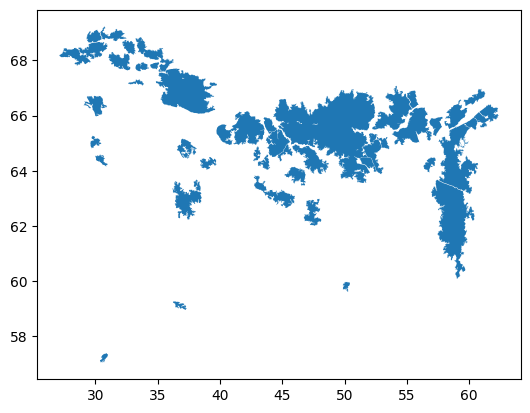

In [14]:
ifl_in_sfo.plot()

In [15]:
ifl_in_sfo.bounds

,minx,miny,maxx,maxy
1511,34.855427,66.065079,39.760146,67.714699
1512,51.216740,63.958622,52.559048,64.489738
1514,45.795540,63.871407,48.738232,64.954369
1515,56.343555,63.934555,57.323883,64.484253
1516,45.155155,63.449429,46.875838,64.142838
1521,58.015461,65.506088,59.867985,66.578705
1522,60.373699,65.570442,62.393112,66.411697
1535,39.723141,64.931741,43.601059,66.159210
1537,56.805992,65.258873,57.895329,65.953268
1538,59.608547,65.472870,60.662437,65.928535


In [17]:
ifl_in_sfo.bounds.to_csv('./data/ifl_bboxes.csv')

In [19]:
bounds = ifl_in_sfo.bounds

In [18]:
from requests import get

In [45]:
r = bounds.iloc[0, :]
r

minx    34.855427
miny    66.065079
maxx    39.760146
maxy    67.714699
Name: 1511, dtype: float64

In [46]:
response = get(f'http://192.168.1.62:8888/mapservices/oodb?request=apioodb&version=1.0.0&apioodbtype=loadobj&bbox={r.minx},{r.miny},{r.maxx},{r.maxy}')

In [48]:
all_objs = response.json()

In [49]:
all_objs.keys()

dict_keys(['features', 'type'])

In [50]:
len(all_objs['features'])

5171

In [51]:
all_objs['features'][0].keys()

dict_keys(['geometry', 'id', 'properties', 'type'])

In [52]:
all_objs['features'][0]['properties']

{'013': 'Каменик',
 'pidOOODBAttr_classCode': '60800',
 'pidOOODBAttr_commitIDFeat': '4',
 'pidOOODBAttr_commitIDGeom': '0',
 'pidOOODBAttr_featureID': '1934833',
 'pidOOODBAttr_geomID': '29205879'}

In [53]:
response = get(f'http://192.168.1.62:8888/mapservices/oodb?request=apioodb&version=1.0.0&apioodbtype=catalog')

In [54]:
response.json()

{'attributes': {'001': {'alias': 'Признак судоходства',
   'defValue': '0.0',
   'domain': {'name': 'Признак судоходства',
    'type': 1,
    'vals': {'100': 'Судоходный', '200': 'Несудоходный'}},
   'key': '001',
   'name': 'navigability',
   'precision': 15,
   'type': 1},
  '002': {'alias': 'Тип водоема',
   'defValue': '0.0',
   'domain': {'name': 'Тип водоема',
    'type': 1,
    'vals': {'100': 'Океан',
     '200': 'Море',
     '300': 'Озеро',
     '400': 'Пруд',
     '500': 'Бассейн',
     '600': 'Площадь разлива реки (озера)',
     '700': 'Водохранилище'}},
   'key': '002',
   'name': 'pondType',
   'precision': 15,
   'type': 1},
  '003': {'alias': 'Происхождение',
   'defValue': '0.0',
   'domain': {'name': 'Происхождение',
    'type': 1,
    'vals': {'100': 'Естественное', '200': 'Искусственное'}},
   'key': '003',
   'name': 'origin',
   'precision': 15,
   'type': 1},
  '004': {'alias': 'Качественные особенности воды',
   'defValue': '0.0',
   'domain': {'name': 'Качествен

In [55]:
response.json().keys()

dict_keys(['attributes', 'classes', 'styles'])

In [56]:
response.json()['classes']

{'10000': {'alias': 'Гидрография',
  'attributes': ['225', '138', '211', '013', '224', '077'],
  'classCode': '10000',
  'drawOrder': 50,
  'name': 'gydro',
  'parent': ''},
 '10100': {'alias': 'Водоем',
  'attributes': ['225',
   '138',
   '211',
   '013',
   '224',
   '077',
   '196',
   '195',
   '010',
   '038',
   '002',
   '003',
   '007',
   '004',
   '005',
   '006',
   '001'],
  'classCode': '10100',
  'drawOrder': 46,
  'name': 'pond',
  'parent': '10000'},
 '10101': {'alias': 'Водохранилище',
  'attributes': ['225',
   '138',
   '211',
   '013',
   '224',
   '077',
   '196',
   '195',
   '010',
   '038',
   '002',
   '003',
   '007',
   '004',
   '005',
   '006',
   '001',
   '138',
   '187',
   '014',
   '216'],
  'classCode': '10101',
  'drawOrder': 44,
  'name': 'waterReservoir',
  'parent': '10100'},
 '10200': {'alias': 'Водоток',
  'attributes': ['225',
   '138',
   '211',
   '013',
   '224',
   '077',
   '003',
   '196',
   '195',
   '011',
   '038',
   '010',
   '036'

In [60]:
response.json()['attributes']

{'001': {'alias': 'Признак судоходства',
  'defValue': '0.0',
  'domain': {'name': 'Признак судоходства',
   'type': 1,
   'vals': {'100': 'Судоходный', '200': 'Несудоходный'}},
  'key': '001',
  'name': 'navigability',
  'precision': 15,
  'type': 1},
 '002': {'alias': 'Тип водоема',
  'defValue': '0.0',
  'domain': {'name': 'Тип водоема',
   'type': 1,
   'vals': {'100': 'Океан',
    '200': 'Море',
    '300': 'Озеро',
    '400': 'Пруд',
    '500': 'Бассейн',
    '600': 'Площадь разлива реки (озера)',
    '700': 'Водохранилище'}},
  'key': '002',
  'name': 'pondType',
  'precision': 15,
  'type': 1},
 '003': {'alias': 'Происхождение',
  'defValue': '0.0',
  'domain': {'name': 'Происхождение',
   'type': 1,
   'vals': {'100': 'Естественное', '200': 'Искусственное'}},
  'key': '003',
  'name': 'origin',
  'precision': 15,
  'type': 1},
 '004': {'alias': 'Качественные особенности воды',
  'defValue': '0.0',
  'domain': {'name': 'Качественные особенности воды',
   'type': 1,
   'vals': {'

In [57]:
cls = response.json()['classes']

In [58]:
id_to_alias = {k: cls[k]['alias'] for k in cls}

In [59]:
id_to_alias

{'10000': 'Гидрография',
 '10100': 'Водоем',
 '10101': 'Водохранилище',
 '10200': 'Водоток',
 '10201': 'Канал, канава',
 '10300': 'Водоисточник',
 '10400': 'Участок водной поверхности',
 '20000': 'Дорожная сеть',
 '20100': 'Автомобильная дорога',
 '20200': 'Железнодорожный путь',
 '20300': 'Пешеходная дорога',
 '20400': 'Канатная дорога',
 '30000': 'Растительность',
 '30100': 'Водная растительность',
 '30200': 'Древесная растительность',
 '30300': 'Кустарниковая растительность',
 '30400': 'Моховая и лишайниковая растительность',
 '30500': 'Полукустарниковая и кустарничковая растительность',
 '30600': 'Травянистая растительность',
 '30700': 'Культурная растительность',
 '30800': 'Просека',
 '40000': 'Административно-территориальное деление',
 '40100': 'Административная граница',
 '40200': 'Пограничный знак',
 '40300': 'Территория административной единицы',
 '50000': 'Населенный пункт',
 '50100': 'Квартал',
 '60000': 'Участок земной поверхности',
 '60100': 'Территория землепользования',


In [65]:
all_objs['features'][0]

{'geometry': {'coordinates': [35.34084139999974, 67.52301980000011],
  'type': 'Point'},
 'id': 1934833,
 'properties': {'013': 'Каменик',
  'pidOOODBAttr_classCode': '60800',
  'pidOOODBAttr_commitIDFeat': '4',
  'pidOOODBAttr_commitIDGeom': '0',
  'pidOOODBAttr_featureID': '1934833',
  'pidOOODBAttr_geomID': '29205879'},
 'type': 'Feature'}